In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import os
%matplotlib inline
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm # recommended import according to the docs



In [3]:
df2 = pd.read_excel('res2.xls', sep = ';')

In [4]:
df2.head()

,№ п/п,Индекс ВМО,Наименование станции,Координаты станции,Unnamed: 4,wet intervals,Unnamed: 6,Unnamed: 7,Unnamed: 8,сухие интервалы,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,широта,долгота,R,P,h,p-value,R,P,h,p-value
1,NaN,1,NaN,NaN,NaN,0.870012,0.309965,1,0.0168219,0.629831,0.240972,1,2.43295e-05
2,NaN,2,NaN,NaN,NaN,0.743809,0.265124,1,0.00041292,0.542553,0.209797,1,0.00287871
3,NaN,3,NaN,NaN,NaN,0.769759,0.314085,1,0.0190351,0.591881,0.184434,1,0.0203902
4,NaN,4,NaN,NaN,NaN,0.887074,0.275002,1,8.83286e-06,0.633721,0.244086,0,0.0831843


In [5]:
r = df2['wet intervals']
r = r[1:]


In [5]:
namelist = os.listdir("D:\ip\perfect_one\csv")

In [6]:
gamma = np.zeros(len(namelist))
lam = np.zeros(len(namelist))


gamma22 = np.zeros(len(namelist))
lam22 = np.zeros(len(namelist))

In [7]:
p1 = 0.25
p2 = 0.5
for i in range(r.size):
    name = namelist[i]
    df = pd.read_csv("D:\ip\perfect_one\csv\\" + name, sep = ';', header = None)
    size = df.shape[0]
    data = df[11]
    maxi = -1;
    maxim = np.array(0)
    for k in range(size):
        if (data[k] > 0):
            if (maxi == -1):
                maxi = data[k]
            else:
                if (maxi < data[k] ):
                    maxi = data[k]
        else:
            if(maxi >= 0):
                maxim =np.append(maxim,maxi)
                maxi = -1
    m = maxim.size
    X = np.zeros(m-1)
    X = maxim[1: m]
    noize = np.random.normal(0, 0.0001, m-1)
    XX = X
    X =X + noize
    X = np.sort(X)
    rr =  r[i+1]
    c = np.zeros(m)
    for k in range(1,m):
        c[k] = math.log(math.pow(k,1/rr)/(math.pow(m,1/rr) - math.pow(k,1/rr) ))
    c = c[1:]
    gamma[i] = ( sum(c * np.log(X)) - sum(np.log(X))*sum(c)/(m-1))/ (sum(np.log(X)**2) - (sum(np.log(X)))**2/(m-1))
    lam[i] = math.exp((sum(c) - gamma[i] * sum(np.log(X)))/(m-1))
    
    
    s = 1.0/rr
    ind1 = math.modf(m*p1)[1]
    ind2 = math.modf(m*p2)[1]
    gamma22[i] = (s*(math.log(p1) - math.log(p2)) +  math.log(1 - p2**s) - math.log(1 - p1**s))/(math.log(X[ind1]) - math.log(X[ind2]))
    lam22[i] = p1**s/((1-p1**s)*(X[ind1]**gamma22[i])) 

    

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:40: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [43]:
import xlsxwriter
df = pd.DataFrame({'No' : namelist, 'R': r, ' Gamma': gamma, 'Lambda' : lam, ' Gamma2': gamma22, 'Lambda2' : lam22})
writer = pd.ExcelWriter('df2.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()

writer.close()

In [12]:
df = pd.read_csv("D:\ip\perfect_one\csv\\27612.csv", sep = ';', header = None)
data = df[11]
maxi = -1;
p1 = 0.1
p2 = 0.5
size = df.shape[0]
rr =  r[226]
s = 1.0/rr
lim = 28
lamm = np.zeros(lim)
gamm = np.zeros(lim)
lambda2 = np.zeros(lim)
gamma2 = np.zeros(lim)
errors1 = np.zeros(lim)
errors2 = np.zeros(lim)
p_values = np.zeros(lim)



for j in range (lim):
    maxim = np.array(0)
    p = 0
    for i in range(size):
        if (data[i] > 0):
            p = p + 1 
            if (maxi == -1):
                maxi = data[i]
            else:
                if (maxi < data[i] ):
                    maxi = data[i]
        else:
            if(maxi >= 0):
                if (p > j ):
                    maxim =np.append(maxim,maxi)
                maxi = -1 
            p = 0
            
    m = maxim.size
    X = np.zeros(m-1)
    X = maxim[1: m]
    BB = X
    BB = np.sort(BB)
   

    noize = np.random.normal(0, 0.0001, m-1)
    XX = X
    X =X + noize
    X = np.sort(X)
    
    
    c = np.zeros(m)
    for k in range(1,m-1):
        c[k] = math.log(math.pow(k,1.0/rr)/(math.pow(m,1.0/rr) - math.pow(k,1.0/rr) ))
    c = c[1:]
    gamm[j] = ( sum(c * np.log(X)) - (sum(np.log(X))*sum(c))/(m-1))/ (sum((np.log(X))**2) - (1.0/(m-1))*(sum(np.log(X)))**2)
    lamm[j] = math.exp((sum(c) - gamm[j] * sum(np.log(X)))/(m-1))
    
    
    
    ind1 = math.modf(m*p1)[1]
    ind2 = math.modf(m*p2)[1]
    gamma2[j] = (s*(math.log(p1) - math.log(p2)) +  math.log(1 - p2**s) - math.log(1 - p1**s))/(math.log(X[ind1]) - math.log(X[ind2]))
    lambda2[j] = p1**s/((1-p1**s)*(X[ind1]**gamma2[j])) 

    ecdf = sm.distributions.ECDF(X)

    x1 = np.linspace(min(BB), max(BB),num=50)
    y1 = ecdf(x1)
    
    y2 =  (lamm[j]*x1**gamm[j]/(1 + lamm[j]*x1**gamm[j]))**rr
    y3 =  (lambda2[j]*x1**gamma2[j]/(1 + lambda2[j]*x1**gamma2[j]))**rr

    
    errors1[j] = sum((y1-y2)**2)
    errors2[j] = sum((y1-y3)**2)
    
    
    
    nn = 50
    blocks = np.linspace(min(BB),max(BB), num = nn)
    BB = np.sort(BB)    
    observed = np.zeros(nn)
    for i in range(nn-1):
        observed[i] = float(BB[(blocks[i] <= BB) & (BB < blocks[i+1])].size)/BB.size
    for i in range(1,nn-1):
        observed[i] = observed[i-1] + observed[i]
    observed[nn-1] = observed[nn-2] + 1.0/BB.size
    
    

C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


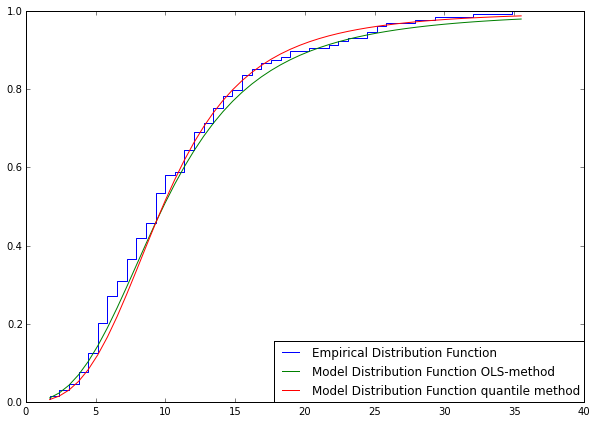

In [11]:
#plt.figure(figsize = (10,10))

plt.figure(figsize = (10,7))
ecdf = sm.distributions.ECDF(BB)

x1 = np.linspace(min(BB), max(BB),num=50)
y1 = ecdf(x1)

#y2 = math.pow(lam1*math.pow(data,gamma1)/(1 + lam1*math.pow(data,gamma1)),rr)
numb = lim - 1
y2 =  (lamm[numb]*x1**gamm[numb]/(1 + lamm[numb]*x1**gamm[numb]))**rr
y3 =  (lambda2[numb]*x1**gamma2[numb]/(1 + lambda2[numb]*x1**gamma2[numb]))**rr


plt.step(x1,y1, label = 'Empirical Distribution Function')
plt.plot(x1,y2,  label = 'Model Distribution Function OLS-method')
plt.plot(x1,y3, label = 'Model Distribution Function quantile method')
#plt.plot(x1,observed)
plt.legend( loc=4, borderaxespad=0.)
plt.savefig('emp10.jpg')
plt.show()

In [130]:
j

0

In [113]:

#p3 = 1/3


ind1 = math.modf(m*p1)[1]
ind2 = math.modf(m*p2)[1]
print ind1, ind2

gamma2 = (s*(math.log(p1) - math.log(p2)) +  math.log(1 - p2**s) - math.log(1 - p1**s))/(math.log(X[ind1]) - math.log(X[ind2]))
lambda2 = p1**s/((1-p1**s)*(math.log(X[ind1])**gamma2)) 


1092.0 2185.0


C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\user\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [132]:
thr = rr * (1 - 0.300092238254986) / 0.300092238254986
thr

1.8635843442435385

In [16]:
np.argmin(errors2)

3

In [18]:
errors1[4]

0.002115370073883076

In [43]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)

Power_divergenceResult(statistic=-7837937.7527373051, pvalue=1.0)

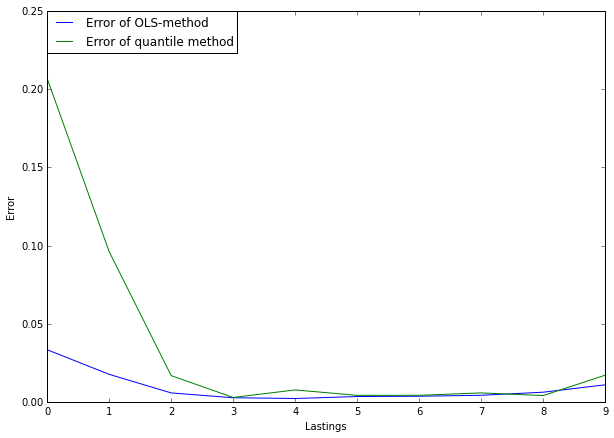

In [19]:
plt.figure(figsize = (10,7))
plt.plot(errors1[:10], label = 'Error of OLS-method')
plt.plot(errors2[:10], label = 'Error of quantile method' )
plt.legend( bbox_to_anchor=(0, 1),loc=2, borderaxespad=0.)
plt.xlabel('Lastings')
plt.ylabel('Error')
plt.savefig('errrors.jpg')
plt.show()

In [10]:
lambda2

array([ nan])

In [12]:
gamma2

array([ 1.09838159])

In [5]:
c = np.array([1,2,3])
a = np.array([4,5,6])
a*c

array([ 4, 10, 18])

In [19]:
gamm[0]

1.3701060785866419

In [16]:
gamma2[0]

1.0983815859416211

In [54]:
n = 50
blocks = np.linspace(min(a),max(a), num = n)
a = np.sort(a)    
observed = np.zeros(n)
for i in range(n-1):
    observed[i] = float(a[(blocks[i] <= a) & (a < blocks[i+1])].size)/a.size
for i in range(1,n-1):
    observed[i] = observed[i-1] + observed[i]
observed[n-1] = observed[n-2] + 1.0/a.size
print observed 

[ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.5         0.5         0.5
  0.5         0.5         0.5         0.5         0.5         0.5         0.5
  0.5         0.5         0.5         0.5         0.5         0.5
  0.83333333  0.83333333  0.83333333  0.83333333  0.83333333  0.83333333
  0.83333333  0.83333333  0.83333333  0.83333333  0.83333333  0.83333333
  0.83333333  0.83333333  0.83333333  0.83333333  0.83333333  1.        ]


In [ ]:
 ecdf = sm.distributions.ECDF(X)
    
    x1 = np.linspace(min(X), max(X))
    y1 = ecdf(x1)
    y2 = 1 - (lamm[j]*x1**gamm[j]/(1 + lamm[j]*x1**gamm[j]))**rr
    
    blocks = np.linspace(min(X),max(X), num = 20)
    
    observed = np.zeros(19)
    for i in range(19):
        observed[i] = X[(blocks[i] <= X) & (X <= blocks[i+1])].size
    
    
    expected = np.zeros(19)
    for i in range(19):
        expected[i] = (lamm[j]*blocks[i+1]**gamm[j]/(1 + lamm[j]*blocks[i+1]**gamm[j]))**rr - (lamm[j]*blocks[i]**gamm[j]/(1 + lamm[j]*blocks[i]**gamm[j]))**rr
    
    
    
    n = X.size
    chi_squared_stat = sum(((observed-n*expected)**2)/(n*expected))
    crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 17)   # Df = number of variable categories - 1
    
    p_values[j] = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=17)
    
 

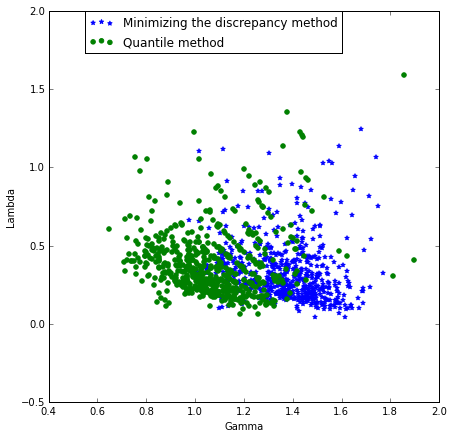

In [24]:
#df = pd.DataFrame({'No' : namelist, 'R': r, ' Gamma': gamma, 'Lambda' : lam, ' Gamma2': gamma22, 'Lambda2' : lam22})

plt.figure(figsize = (7,7))
plt.scatter(gamma,lam, color = 'blue',marker = '*', label = 'Minimizing OLS-method ')
plt.hold()
plt.scatter(gamma22,lam22, color = 'green', marker = 'o', label = 'Quantile method ')
plt.legend( bbox_to_anchor=(0.75, 1),loc=1, borderaxespad=0.)
plt.xlabel('Gamma')
plt.ylabel('Lambda')
plt.savefig('gl_.jpg')


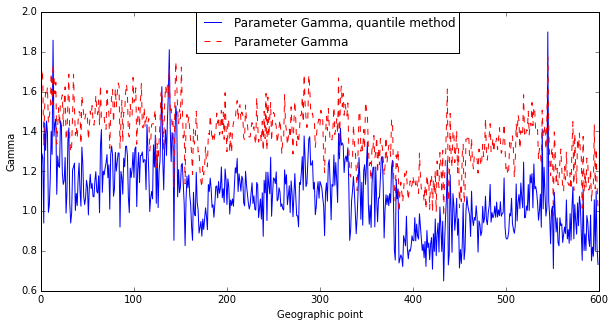

In [21]:
plt.figure(figsize = (10,5))
plt.plot(gamma22,  label="Parameter Gamma, quantile method")
plt.plot(gamma, 'r--', label="Parameter Gamma" )
plt.legend( bbox_to_anchor=(0.75, 1),loc=1, borderaxespad=0.)
plt.xlabel('Geographic point')
plt.ylabel('Gamma')
plt.savefig('gg_.jpg')


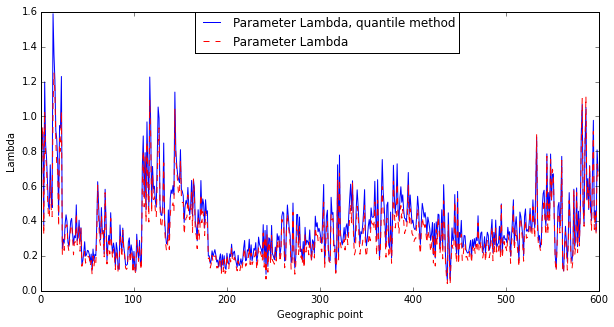

In [22]:
plt.figure(figsize = (10,5))
plt.plot(lam22,  label="Parameter Lambda, quantile method")
plt.plot(lam, 'r--', label="Parameter Lambda" )
plt.legend(bbox_to_anchor=(0.75, 1),loc=1, borderaxespad=0.)
plt.xlabel('Geographic point')
plt.ylabel('Lambda')
plt.savefig('ll_.jpg')

In [105]:
min(lam)

0.039839158051320593